In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product, chain, combinations
from scipy import stats
from IPython.display import display, HTML
%matplotlib inline

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

def get_file_name(name):
    return name.replace(':', '-')

In [52]:
inputFile = 'snp.csv'

plotSize = (13, 10)
plotStyle = 'seaborn-v0_8-whitegrid'
saveFigures = False

In [48]:
df = pd.read_csv('data/' + inputFile)
df

,nodes,time,rss
0,10,1725.62,1174528
1,20,963.68,1379964
2,30,734.36,1742268
3,40,655.31,2125904
4,50,549.87,2511664


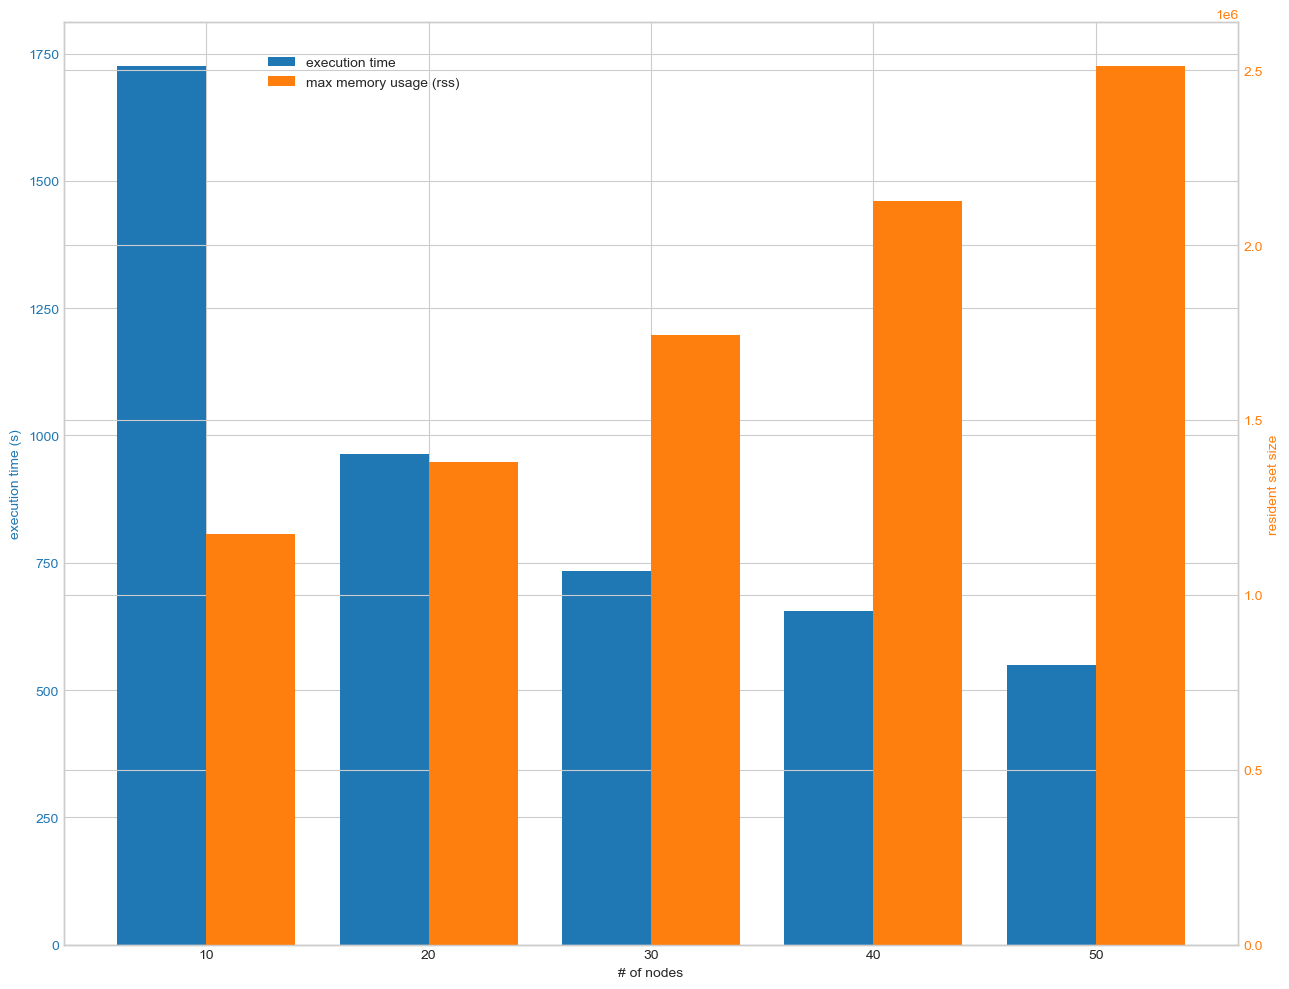

In [54]:
plt.style.use(plotStyle)
barwidth = 4
#barwidth = 0.2

fig, ax1 = plt.subplots(figsize=plotSize)

color = 'tab:blue'
ax1.set_xlabel('# of nodes')
#ax1.set_xlabel('tx/s (entire network)')
ax1.set_ylabel('execution time (s)', color=color)
ax1.bar(df['nodes'] - 2, df['time'], barwidth, color=color, label='execution time')
#ax1.bar(df['txps'] - 0.1, df['time'], barwidth, color=color, label='execution time')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('resident set size', color=color)
ax2.bar(df['nodes'] + 2, df['rss'], barwidth, color=color, label='max memory usage (rss)')
#ax2.bar(df['txps'] + 0.1, df['rss'], barwidth, color=color, label='max memory usage (rss)')
ax2.tick_params(axis='y', labelcolor=color)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.2, 0.95))
#fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.05, 0.95))

fig.tight_layout()
if saveFigures:
    fig.savefig('figures/snp.eps', format='eps')
    #fig.savefig('figures/stp.eps', format='eps')
plt.show()

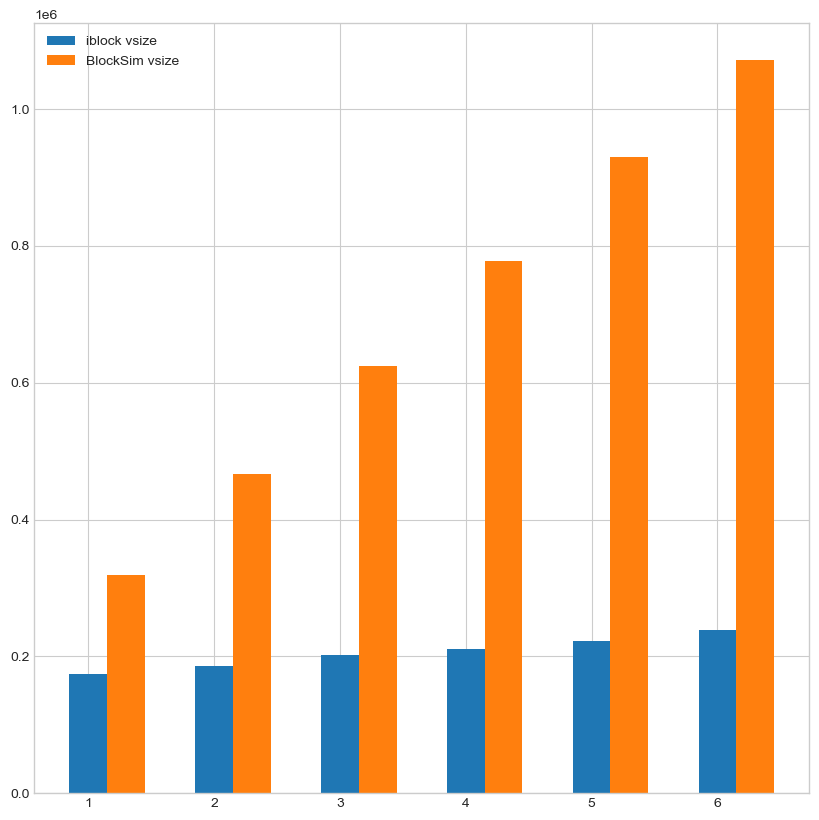

In [64]:
tot = pd.read_csv('data/tot.csv')

barwidth = 0.3

plt.figure(figsize=plotSize)
plt.bar(np.arange(1, 7), tot['ibvsz'], barwidth, label="iblock vsize")
plt.bar(np.arange(1, 7) + barwidth, tot['bsvsz'], barwidth, label="BlockSim vsize")
plt.legend()
plt.show()

# plt.figure(figsize=(10, 100))
# plt.bar(np.arange(1, 7), tot['ibtime'], barwidth, label="iblock time")
# plt.bar(np.arange(1, 7) + barwidth, tot['bstime'], barwidth, label="BlockSim time")
# plt.legend()
# plt.show()

In [36]:
df2 = pd.read_csv('data/bnptime.csv')
df2['partialtime'] = df2['time'].diff()
df2['partialtime-diff'] = df2['partialtime'].diff()
df2['simsec-sec'] = 43200 / df2['partialtime']
df2['simsec-sec-diff'] = df2['simsec-sec'].diff()
df2 = df2.drop(0)
df2

,simtime,time,partialtime,partialtime-diff,simsec-sec,simsec-sec-diff
1,43200,40,40.0,NaN,1080.000000,NaN
2,86400,100,60.0,20.0,720.000000,-360.000000
3,129600,186,86.0,26.0,502.325581,-217.674419
4,172800,297,111.0,25.0,389.189189,-113.136392
5,216000,433,136.0,25.0,317.647059,-71.542130
6,259200,592,159.0,23.0,271.698113,-45.948946
7,302400,780,188.0,29.0,229.787234,-41.910879
8,345600,983,203.0,15.0,212.807882,-16.979352
9,388800,1215,232.0,29.0,186.206897,-26.600985
10,432000,1467,252.0,20.0,171.428571,-14.778325


34.0

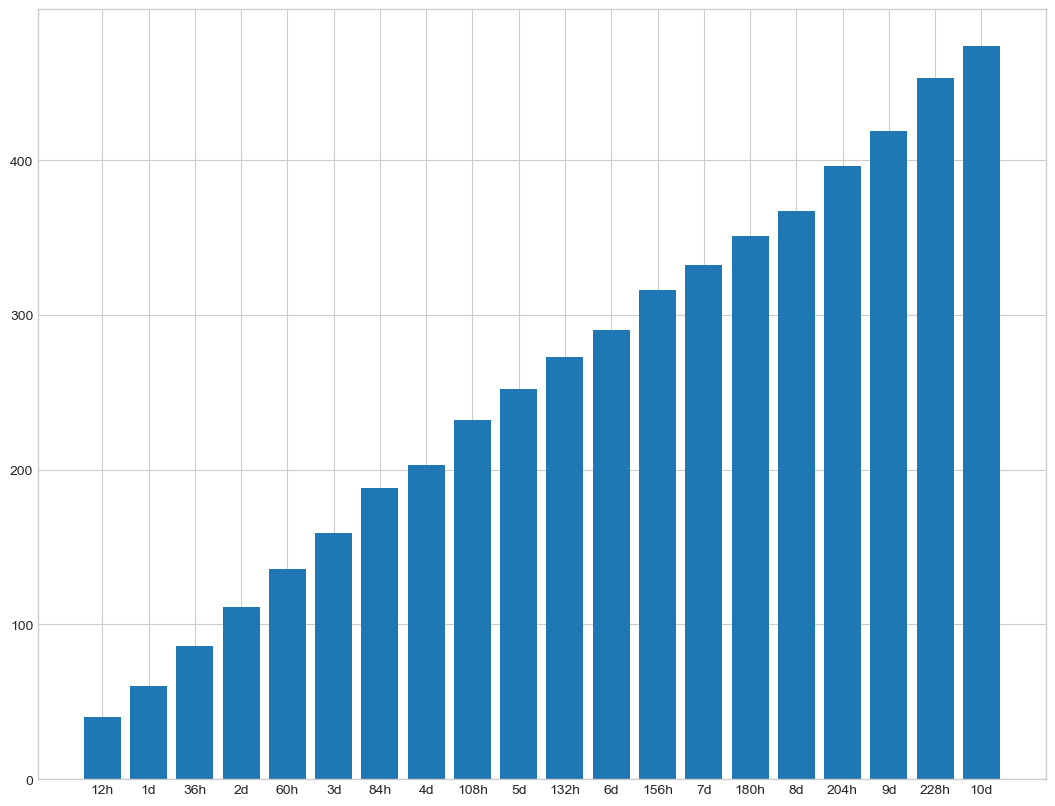

In [43]:
plt.figure(figsize=plotSize)
labels = ['12h', '1d', '36h', '2d', '60h', '3d', '84h', '4d', '108h', '5d', '132h', '6d', '156h', '7d', '180h', '8d', '204h', '9d', '228h', '10d']
plt.bar(labels, df2['partialtime'], label="partialtime")
plt.gca().set_xticks(labels)
plt.show()

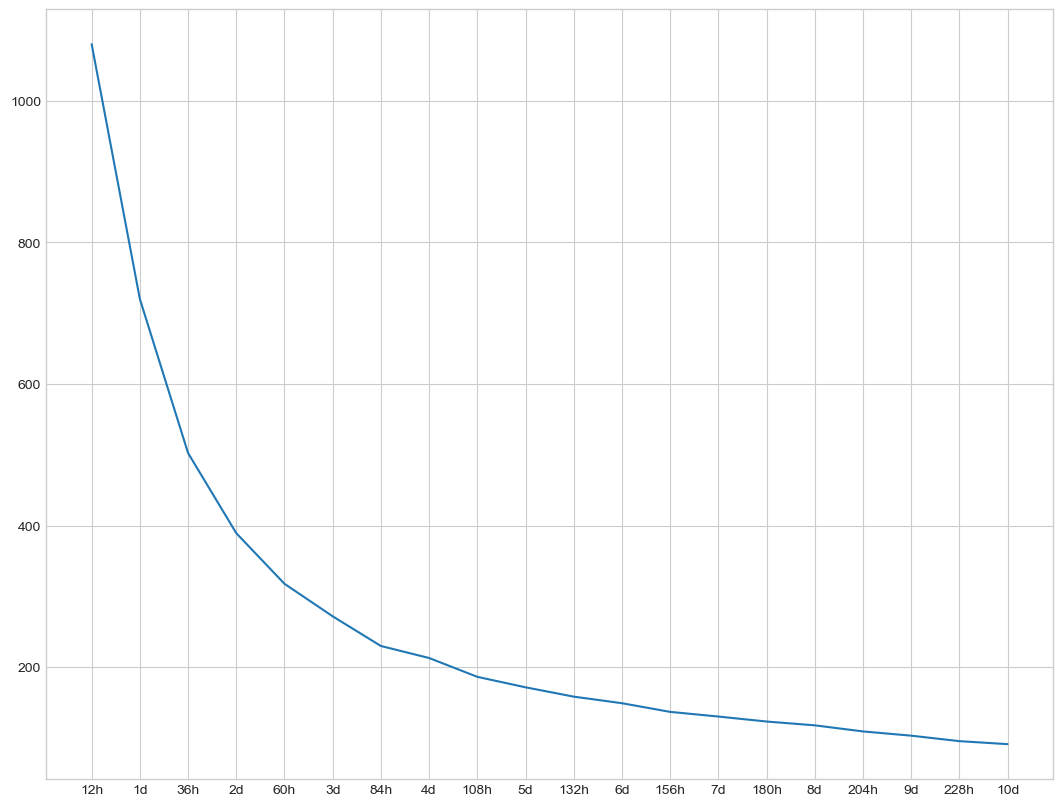

In [44]:
plt.figure(figsize=plotSize)
plt.plot(labels, df2['simsec-sec'], label="simsec/sec")
plt.gca().set_xticks(labels)
plt.show()

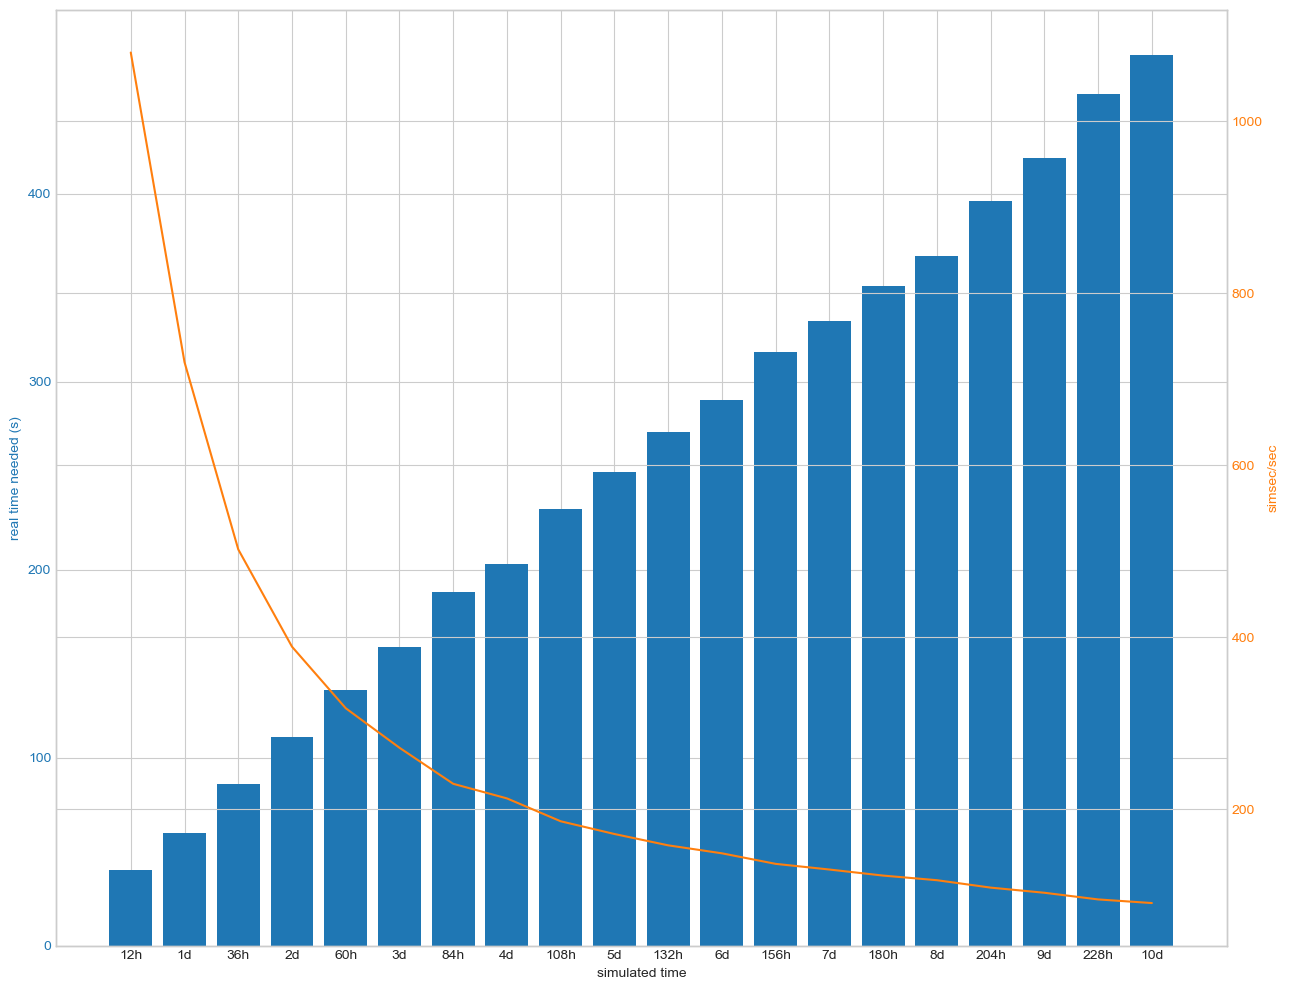

In [48]:
fig, ax1 = plt.subplots(figsize=plotSize)

color = 'tab:blue'
ax1.set_xlabel('simulated time')
ax1.set_ylabel('real time needed (s)', color=color)
ax1.bar(labels, df2['partialtime'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('simsec/sec', color=color)  # we already handled the x-label with ax1
ax2.plot(labels, df2['simsec-sec'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()